# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [5]:
from sklearn import preprocessing

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
        x = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit_transform(x)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[256,128,64]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model=build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


In [40]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-2,1e-1]
EPOCHS = 25
BATCH_SIZE = 256
MOMENTUM = 0.95
OPTIMIZER = {keras.optimizers.SGD:"SGD",
            keras.optimizers.RMSprop:"RMSprop",
            keras.optimizers.Adagrad:"Adagrad",
            keras.optimizers.Adam:"Adam"}


In [41]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    #call the function and name individually
    for optimizer,name in OPTIMIZER.items():
            keras.backend.clear_session() # 把舊的 Graph 清掉
            lable= str(lr) +" + "+ name
            print("Experiment with " + lable)
            model = build_mlp(input_shape=x_train.shape[1:])
            model.summary()
            optimizer=optimizer(lr=lr)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

            model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
            # Collect results
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["accuracy"]
            valid_acc = model.history.history["val_accuracy"]
    
            exp_name_tag = "experience with = %s" % str(lable)
            results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with 0.01 + SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==================

50000/50000 [==============================] - 10s 196us/step - loss: 1.3870 - accuracy: 0.5169 - val_loss: 1.8799 - val_accuracy: 0.4140
Epoch 17/25
50000/50000 [==============================] - 7s 136us/step - loss: 1.3748 - accuracy: 0.5200 - val_loss: 2.0559 - val_accuracy: 0.4142
Epoch 18/25
50000/50000 [==============================] - 9s 182us/step - loss: 1.3661 - accuracy: 0.5243 - val_loss: 1.5741 - val_accuracy: 0.4808
Epoch 19/25
50000/50000 [==============================] - 7s 142us/step - loss: 1.3488 - accuracy: 0.5306 - val_loss: 1.7974 - val_accuracy: 0.4166
Epoch 20/25
50000/50000 [==============================] - 13s 259us/step - loss: 1.3411 - accuracy: 0.5356 - val_loss: 1.7286 - val_accuracy: 0.4503
Epoch 21/25
50000/50000 [==============================] - 14s 289us/step - loss: 1.3304 - accuracy: 0.5371 - val_loss: 2.3760 - val_accuracy: 0.4194
Epoch 22/25
50000/50000 [==============================] - 7s 131us/step - loss: 1.3290 - accuracy: 0.5393 - val_lo

50000/50000 [==============================] - 13s 266us/step - loss: 1.3773 - accuracy: 0.5111 - val_loss: 1.4807 - val_accuracy: 0.4827
Epoch 7/25
50000/50000 [==============================] - 9s 182us/step - loss: 1.3375 - accuracy: 0.5284 - val_loss: 1.4688 - val_accuracy: 0.4907
Epoch 8/25
50000/50000 [==============================] - 10s 200us/step - loss: 1.3052 - accuracy: 0.5389 - val_loss: 1.4910 - val_accuracy: 0.4931
Epoch 9/25
50000/50000 [==============================] - 9s 178us/step - loss: 1.2759 - accuracy: 0.5481 - val_loss: 1.4434 - val_accuracy: 0.4986
Epoch 10/25
50000/50000 [==============================] - 11s 213us/step - loss: 1.2513 - accuracy: 0.5565 - val_loss: 1.4613 - val_accuracy: 0.5043
Epoch 11/25
50000/50000 [==============================] - 10s 196us/step - loss: 1.2215 - accuracy: 0.5708 - val_loss: 1.4850 - val_accuracy: 0.4938
Epoch 12/25
50000/50000 [==============================] - 9s 182us/step - loss: 1.1994 - accuracy: 0.5785 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 16s 328us/step - loss: 709.7161 - accuracy: 0.0987 - val_loss: 2.3121 - val_accuracy: 0.1000
Epoch 2/25
50000/50000 [==============================] - 14s 279us/step - loss: 2.3078 - accuracy: 0.0999 - val_loss: 2.3129 - val_accuracy: 0.1000
Epoch 3/25
50000/50000 [==============================] - 10s 193us/step - loss: 2.3077 - accuracy: 0.0976 - val_loss: 2.3214 - val_accuracy: 0.1000
Epoch 4/25
50000/50000 [==============================] - 6s 125us/step - loss: 2.3080 - accuracy: 0.0976 - val_loss: 2.3191 - val_accuracy: 0.1000
Epoch 5/25
50000/50000 [==============================] - 6s 120us/step - loss: 2.3082 - accuracy: 0.0981 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 6/25
50000/50000 [==============================] - 6s 129us/step - loss: 2.3080 - accuracy: 0.0991 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 7/25
50000/50000 [==============================] -

50000/50000 [==============================] - 6s 120us/step - loss: 0.8850 - accuracy: 0.6752 - val_loss: 1.8503 - val_accuracy: 0.4571
Epoch 24/25
50000/50000 [==============================] - 6s 121us/step - loss: 0.8527 - accuracy: 0.6865 - val_loss: 2.0055 - val_accuracy: 0.4390
Epoch 25/25
50000/50000 [==============================] - 6s 114us/step - loss: 0.8311 - accuracy: 0.6935 - val_loss: 1.9315 - val_accuracy: 0.4547
Experiment with 0.1 + Adam
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
___________________________________________________________

In [58]:
for lr in LEARNING_RATE:
    #call the function and name individually
    for optimizer,name in OPTIMIZER.items():
            keras.backend.clear_session() # 把舊的 Graph 清掉
            lable= str(lr) +" + "+ name
            print("experience with = " + lable)

experience with = 0.01 + SGD
experience with = 0.01 + RMSprop
experience with = 0.01 + Adagrad
experience with = 0.01 + Adam
experience with = 0.1 + SGD
experience with = 0.1 + RMSprop
experience with = 0.1 + Adagrad
experience with = 0.1 + Adam


In [59]:
results["experience with = 0.01 + SGD"]

{'train-loss': [2.064857902755737,
  1.829125755996704,
  1.7293897970581054,
  1.6679688066864014,
  1.6214119525909423,
  1.5828931540679931,
  1.549718930091858,
  1.5193801726531981,
  1.4908095785522462,
  1.4655495474624634,
  1.440742109451294,
  1.417054242248535,
  1.3949003482437135,
  1.3744671684265137,
  1.3540925101470946,
  1.3342259337615967,
  1.3161315506744384,
  1.2972441897201539,
  1.280276987876892,
  1.262467176513672,
  1.2458178064727783,
  1.2300360402679444,
  1.2146638842391968,
  1.1994012744522096,
  1.1833181325912476],
 'valid-loss': [1.8993136236190795,
  1.7675237825393677,
  1.6956315757751466,
  1.6485453105926513,
  1.6121745840072632,
  1.5825848852157594,
  1.5555376935958862,
  1.5366933349609375,
  1.5183861293792724,
  1.4972290649414062,
  1.4824480758666991,
  1.470602201461792,
  1.4646658893585205,
  1.449032546234131,
  1.4330370483398438,
  1.429040817642212,
  1.420772344970703,
  1.4104917575836182,
  1.4046695375442504,
  1.4037722190

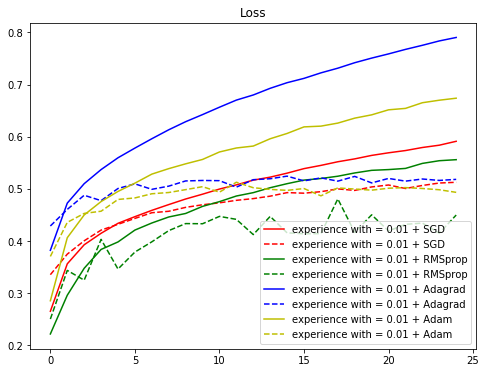

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k","pink","c"]

plt.figure(figsize=(8,6))
n=0

for i, cond in enumerate(results.keys()):
    if n<4:
        plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond][ 'valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
        n=n+1
    else:
        break
plt.title("Loss")
plt.legend()
plt.show()



對RMSprop來說,lr 0.01略顯不足。
對SGD,Adagrad,Adam 來說,lr 0.01 是可行的。且SGD的差異最小。Adagrad可能有過度訓練之嫌疑。

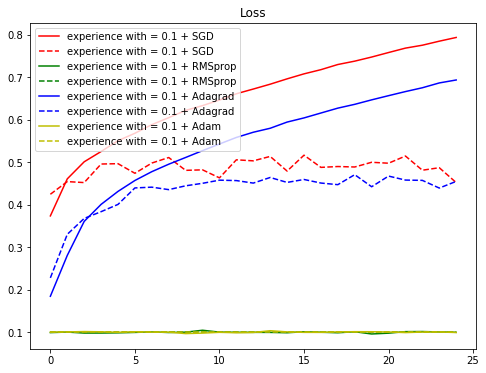

In [76]:
color_bar = ["m", "k","pink","c","r", "g", "b", "y"]

plt.figure(figsize=(8,6))
n=0

for i, cond in enumerate(results.keys()):
    if n>3:
        plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond][ 'valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
        n=n+1
    else:
        n=n+1
plt.title("Loss")
plt.legend()
plt.show()




對RMSprop and Adam optimizer來說,lr 0.1 是過大的。
對SGD and Adagrad來說,lr 0.1 是可行的。但有過度訓練之嫌疑。